<a href="https://colab.research.google.com/github/fg0611/data-professionalization/blob/main/data-science/ch_food_fg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/project/datasets/protein

/content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/project/datasets/protein


In [ ]:
ls

datos_limpios.csv  ghg_protein.csv  land_protein.csv  water_protein.csv


In [ ]:
## ops libs
import pandas as pd
import pandas_profiling
import numpy as np
## vis libs
import matplotlib.pyplot as plt
import seaborn as sns
# this line allows to see plots
%matplotlib inline


In [ ]:
land_protein = pd.read_csv('land_protein.csv')
# land_protein.set_index('food', inplace=True)
land_protein.drop(["Code", "Year"], axis=1, inplace=True, errors='ignore')
land_protein.sort_values("food", ascending=True)
land_protein.head()

,food,m2_per_100gr_of_protein
0,Apples,21.000000
1,Bananas,21.444444
2,Beef (beef herd),163.595787
3,Beef (dairy herd),21.904762
4,Berries & Grapes,24.100000


In [ ]:
water_protein = pd.read_csv('water_protein.csv')
# water_protein.set_index('food', inplace=True)
#df['A'] = (df['A'] / 100).round(2)
# df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1)  # new method
water_protein['water_lts_per_100gr'] = (water_protein['water_lts_per_100gr']/1000)
water_protein.rename({'water_lts_per_100gr': 'water_tonnes_per_100gr_of_protein'}, axis=1, inplace=True)
water_protein.drop(["Code", "Year"], axis=1, inplace=True, errors='ignore')
water_protein.sort_values("food", ascending=True)
water_protein.head()

,food,water_tonnes_per_100gr_of_protein
0,Apples,431.620000
1,Bananas,7.354444
2,Beef (beef herd),17.418506
3,Beef (dairy herd),60.691591
4,Berries & Grapes,211.621000


In [ ]:
ghg_protein = pd.read_csv('ghg_protein.csv')
# ghg_protein.set_index('food', inplace=True)
ghg_protein.drop(["Code", "Year"], axis=1, inplace=True, errors='ignore')
ghg_protein.sort_values("food", ascending=True)
ghg_protein.head()

,food,ghg_kg_per_100gr_protein
0,Apples,14.333333
1,Bananas,9.555556
2,Beef (beef herd),49.889669
3,Beef (dairy herd),16.869301
4,Berries & Grapes,15.300000


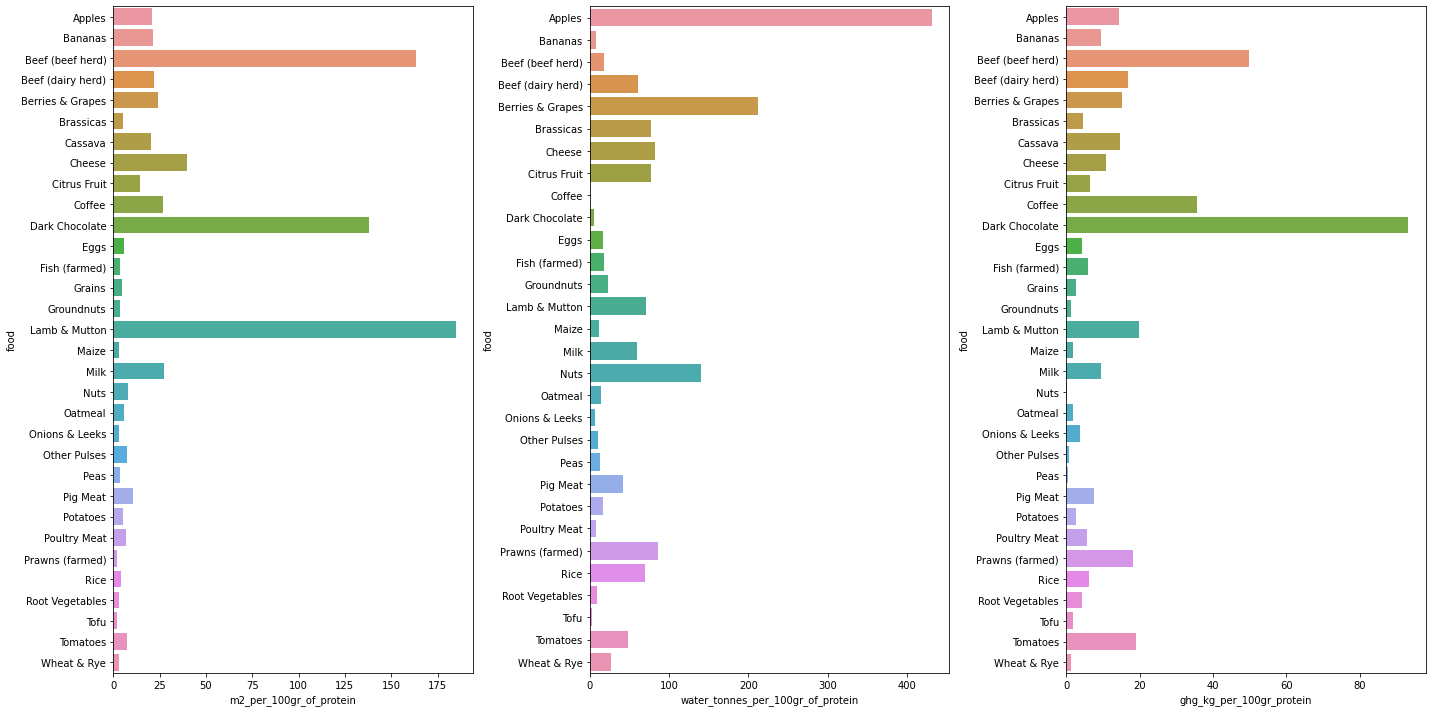

In [ ]:
# plt.subplot(rows, cols, graph pos)
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
sns.barplot(data=land_protein, x='m2_per_100gr_of_protein', y='food')
plt.subplot(1,3,2)
sns.barplot(data=water_protein, x='water_tonnes_per_100gr_of_protein', y='food')
plt.subplot(1,3,3)
sns.barplot(data=ghg_protein, x='ghg_kg_per_100gr_protein', y='food')
plt.tight_layout()

This 3 figures shows which foods requires more resources. It would be interesting if metrics related to human food requirements could be crossed with this numbers somehow, in order to see possibly the most "more sustainable" foods being produced worldwide.

In [ ]:
# merging the 3 dataframes in order to get
protein = pd.merge(land_protein, water_protein, how='inner', on='food')
protein = pd.merge(protein, ghg_protein, how='inner', on='food')
protein.head()

,food,m2_per_100gr_of_protein,water_tonnes_per_100gr_of_protein,ghg_kg_per_100gr_protein
0,Apples,21.000000,431.620000,14.333333
1,Bananas,21.444444,7.354444,9.555556
2,Beef (beef herd),163.595787,17.418506,49.889669
3,Beef (dairy herd),21.904762,60.691591,16.869301
4,Berries & Grapes,24.100000,211.621000,15.300000


In [ ]:
# seeing correlation between vars
protein_corr = protein.corr()
protein_corr.style.background_gradient(cmap='coolwarm')

,m2_per_100gr_of_protein,water_tonnes_per_100gr_of_protein,ghg_kg_per_100gr_protein
m2_per_100gr_of_protein,1.000000,-0.010356,0.713803
water_tonnes_per_100gr_of_protein,-0.010356,1.000000,-0.029437
ghg_kg_per_100gr_protein,0.713803,-0.029437,1.000000


[Text(0.5, 0, 'm2_per_100gr_of_protein'),
 Text(1.5, 0, 'water_tonnes_per_100gr_of_protein'),
 Text(2.5, 0, 'ghg_kg_per_100gr_protein')]

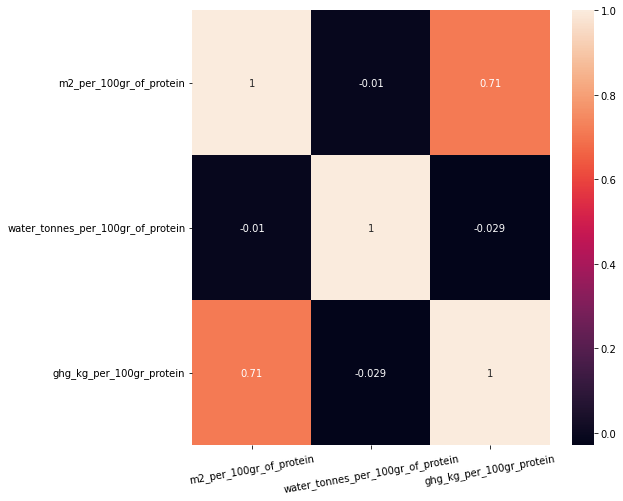

In [ ]:
plt.figure(figsize = (8,8))
ax = sns.heatmap(protein_corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)

This correlation plot shows a correlation between Land Use and GHG emissions for food production

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

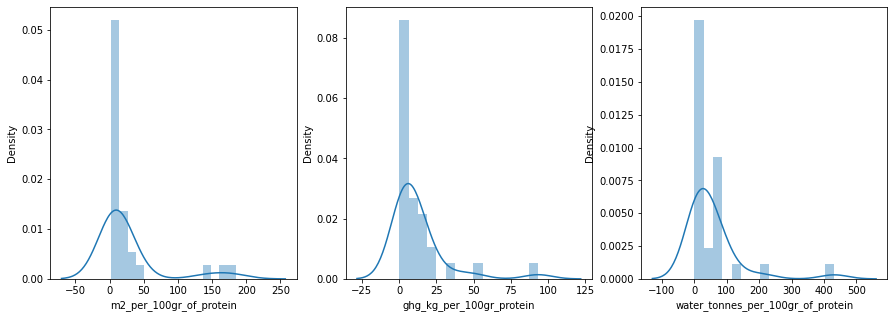

In [ ]:
# sns.displot(data=protein, x="m2_per_100gr_of_protein")
fig = plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(protein.m2_per_100gr_of_protein, kde=True, bins=15, label='land_use');
plt.subplot(1,3,2)
sns.distplot(protein.ghg_kg_per_100gr_protein, kde=True, bins=15, label='land_use');
plt.subplot(1,3,3)
sns.distplot(protein.water_tonnes_per_100gr_of_protein, kde=True, bins=15, label='land_use');
# protein.head()

In [ ]:
# machine learning
from time import time
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [ ]:
# a model that predicts the *** GHG in kg of CO2eq per 100gr of protein *** of any food based on the other vars.
X = protein.iloc[:, 1:len(protein.columns)-1]
X.head(1)

,m2_per_100gr_of_protein,water_tonnes_per_100gr_of_protein
0,21.0,431.62


In [ ]:
y = protein[['ghg_kg_per_100gr_protein']]
y.head(1)

,ghg_kg_per_100gr_protein
0,14.333333


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# definition of the regression algorithim
regresor = SVR(kernel='linear')
start_time = time()

# training
regresor.fit(X_train.values, y_train.values.ravel())
print(f'ended in {time() - start_time} sec')

ended in 0.01590251922607422 sec


In [ ]:
y_pred = regresor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2 to 10
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   m2_per_100gr_of_protein            22 non-null     float64
 1   water_tonnes_per_100gr_of_protein  22 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


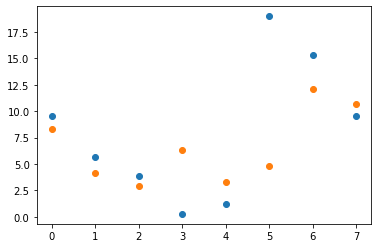

In [ ]:
to_test = 8
X_axis = np.arange(to_test)

fig, ax = plt.subplots()
ax.scatter(X_axis, y_test.iloc[0:to_test].values)
ax.scatter(X_axis, y_pred[0:to_test])
plt.show()

In [ ]:
r2_score(y_test, y_pred)

0.15273126611249122

this R2 (coefficient of determination) was a bit low. Let's test it with a polynomial regresor model

In [ ]:
# definition of the regression algorithim
regresor = SVR(kernel='poly')
start_time = time()

# training
regresor.fit(X_train.values, y_train.values.ravel())
print(f'ended in {time() - start_time} sec')

ended in 0.0014874935150146484 sec


In [ ]:
r2_score(y_test, y_pred)

0.15273126611249122

In [ ]:
# definition of the regression algorithim
regresor = SVR(kernel='rbf')
start_time = time()

# training
regresor.fit(X_train.values, y_train.values.ravel())
print(f'ended in {time() - start_time} sec')

ended in 0.003983974456787109 sec


In [ ]:
r2_score(y_test, y_pred)

0.15273126611249122

0.36363636363636365

with the same R2 it's is clear that this goes down to the quantity of rows of this dataset which restricts chances of a better model 